# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [49]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

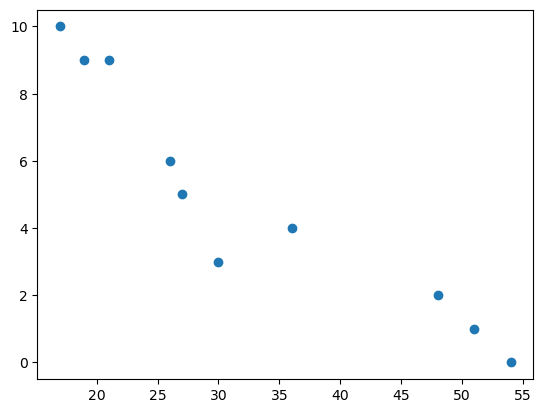

In [17]:
plt.scatter(x=student_data['Edad'], y=student_data['Retrasos'])
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Relación inversa entre edad y retrasos, a más edad, menos retrasos

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [44]:
# Covarianza
cov = student_data.cov()

# Correlación
corr = student_data.corr()

print(f"La covarianza es:\n{cov}\n")
print(f"La correlación es:\n{corr}\n")

'''
La covarianza muestra la dirección de la relación entre las dos variables. 
La correlación es una medida estandarizada entre -1 y 1.
-1 indica una relación negativa perfecta, 1 una relación positiva perfecta.
-0.93 indica una fuerte relación negativa entre edad y retrasos
'''

La covarianza es:
                Edad   Retrasos
Edad      187.655556 -45.566667
Retrasos  -45.566667  12.544444

La correlación es:
              Edad  Retrasos
Edad      1.000000 -0.939163
Retrasos -0.939163  1.000000



'\n\nLa covarianza muestra la dirección de la relación entre las dos variables. \nLa correlación es una medida estandarizada entre -1 y 1.\n-1 indica una relación negativa perfecta, 1 una relación positiva perfecta.\n-0.93 indica una fuerte relación negativa entre edad y retrasos\n\n'

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [61]:
# Definir la X / Y del modelo de regresión

X,y = student_data[["Edad"]], student_data[["Retrasos"]]
print(X.shape, y.shape)

print('Shape of data: {} {}'.format(X.shape, y.shape))

(10, 1) (10, 1)
Shape of data: (10, 1) (10, 1)


In [73]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform de fitting
lm.fit(X,y)

# Print coefs
print(lm.intercept_, lm.coef_)

[12.88880336] [[-0.24282077]]


Grafica tu modelo de regresión en tu diagrama de dispersión.

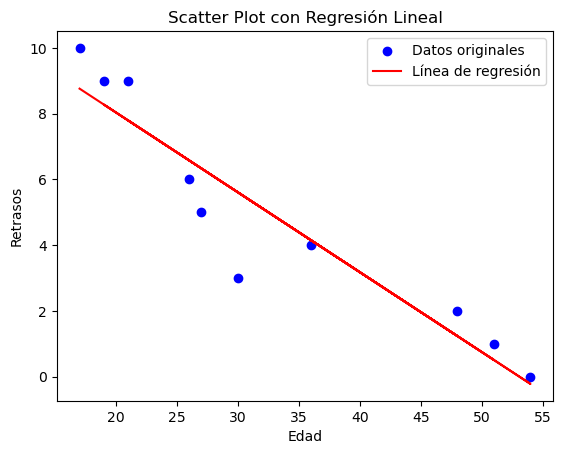

In [83]:
# Agregar las predicciones al DataFrame
student_data['Predicciones'] = lm.predict(X)

# 2. Crear el diagrama de dispersión de los datos originales
plt.scatter(x=student_data['Edad'], y=student_data['Retrasos'], color='blue', label="Datos originales")

# 3. Graficar la línea de regresión
plt.plot(student_data['Edad'], student_data['Predicciones'], color='red', label="Línea de regresión")

# 4. Añadir etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Retrasos")
plt.title("Scatter Plot con Regresión Lineal")
plt.legend()

# 5. Mostrar el gráfico
plt.show()



Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_s, student_data["Predicciones"])

0.8820265558250109

La edad es un buen predictor de la tardanza

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [105]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [109]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [113]:
vehicles.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [117]:
numerical_vehicles = vehicles.select_dtypes(include = [np.number])
numerical_vehicles.head()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,2.5,4.0,19.388824,18,17,17,522.764706,1950
1,1984,4.2,6.0,25.354615,13,13,13,683.615385,2550
2,1985,2.5,4.0,20.600625,16,17,16,555.437500,2100
3,1985,4.2,6.0,25.354615,13,13,13,683.615385,2550
4,1987,3.8,6.0,20.600625,14,21,16,555.437500,2550


In [125]:
corr_v = numerical_vehicles.corr()
corr_v

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [131]:
corr_v["CO2 Emission Grams/Mile"].abs().sort_values(ascending=False)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Highway MPG                0.926405
Combined MPG               0.926229
City MPG                   0.894139
Engine Displacement        0.803520
Cylinders                  0.752393
Year                       0.222300
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
# The most influentia variable is Fuel Barrels/Year, the least is the Year
# With correlation greater than 0.8 we have Fuel Cost/Year, highway MPG, combinded MPG, city MPG

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [166]:
# Regresión lineal para CO2 Emission Grams/Mile
# Definir la X / Y del modelo de regresión

X,y = vehicles[["Fuel Barrels/Year"]], vehicles[["CO2 Emission Grams/Mile"]]
print(X.shape, y.shape)

print('Shape of data: {} {}'.format(X.shape, y.shape))

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform de fitting
lm.fit(X,y)

# Print coefs
print(lm.intercept_, lm.coef_)

(35952, 1) (35952, 1)
Shape of data: (35952, 1) (35952, 1)
[12.48652083] [[26.2836254]]


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

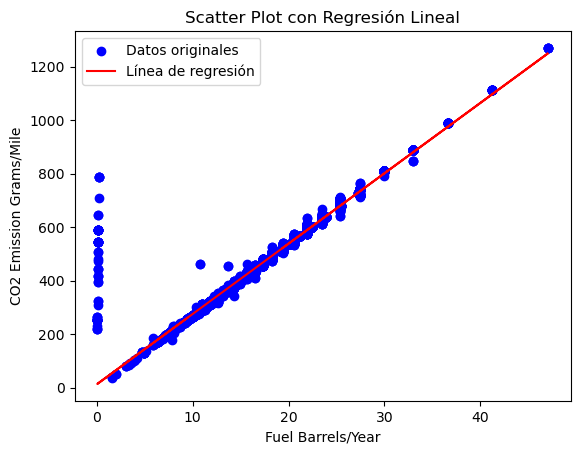

In [149]:
# Agregar las predicciones al DataFrame
vehicles['Predicciones'] = lm.predict(X)

# 2. Crear el diagrama de dispersión de los datos originales
plt.scatter(x=vehicles["Fuel Barrels/Year"], y=vehicles[["CO2 Emission Grams/Mile"]], color='blue', label="Datos originales")

# 3. Graficar la línea de regresión
plt.plot(vehicles["Fuel Barrels/Year"], vehicles['Predicciones'], color='red', label="Línea de regresión")

# 4. Añadir etiquetas y título
plt.xlabel("Fuel Barrels/Year")
plt.ylabel("CO2 Emission Grams/Mile")
plt.title("Scatter Plot con Regresión Lineal")
plt.legend()

# 5. Mostrar el gráfico
plt.show()

In [ ]:
# Regresión lineal para Highway MPG
# Definir la X / Y del modelo de regresión

X,y = vehicles[["Fuel Barrels/Year"]], vehicles[["Highway MPG"]]
print(X.shape, y.shape)

print('Shape of data: {} {}'.format(X.shape, y.shape))

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform de fitting
lm.fit(X,y)

# Print coefs
print(lm.intercept_, lm.coef_)

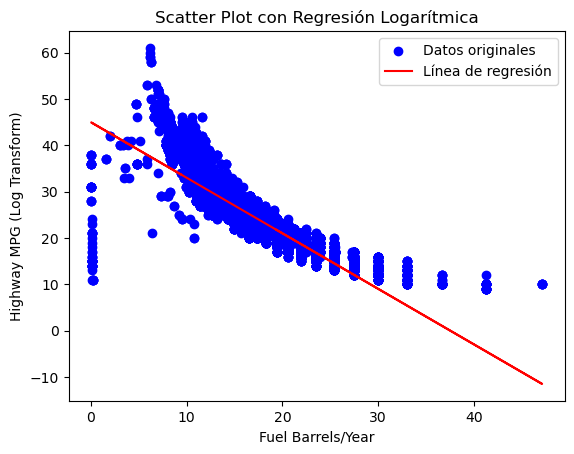

In [182]:
# Agregar las predicciones al DataFrame
vehicles['Predicciones'] = lm.predict(X)

# 2. Crear el diagrama de dispersión de los datos originales
plt.scatter(x=vehicles["Fuel Barrels/Year"], y=(vehicles["Highway MPG"]), color='blue', label="Datos originales")

# 3. Graficar la línea de regresión
plt.plot(vehicles["Fuel Barrels/Year"],(vehicles['Predicciones']), color='red', label="Línea de regresión")

# 4. Añadir etiquetas y título
plt.xlabel("Fuel Barrels/Year")
plt.ylabel("Highway MPG (Log Transform)")
plt.title("Scatter Plot con Regresión Logarítmica")
plt.legend()

# 5. Mostrar el gráfico
plt.show()

In [168]:
# Regresión lineal múltiple
# Definir la X / Y del modelo de regresión

X_m = vehicles[["Fuel Barrels/Year", "Fuel Cost/Year" , "Highway MPG", "Combined MPG"]]
y_m = vehicles[["CO2 Emission Grams/Mile"]]
print(X.shape, y.shape)

print('Shape of data: {} {}'.format(X.shape, y.shape))

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform de fitting
lm.fit(X_m,y_m)

# Print coefs
print(lm.intercept_, lm.coef_)

(35952, 1) (35952, 1)
Shape of data: (35952, 1) (35952, 1)
[152.9726071] [[18.80832392  0.03524507 -2.8430866  -0.3845145 ]]


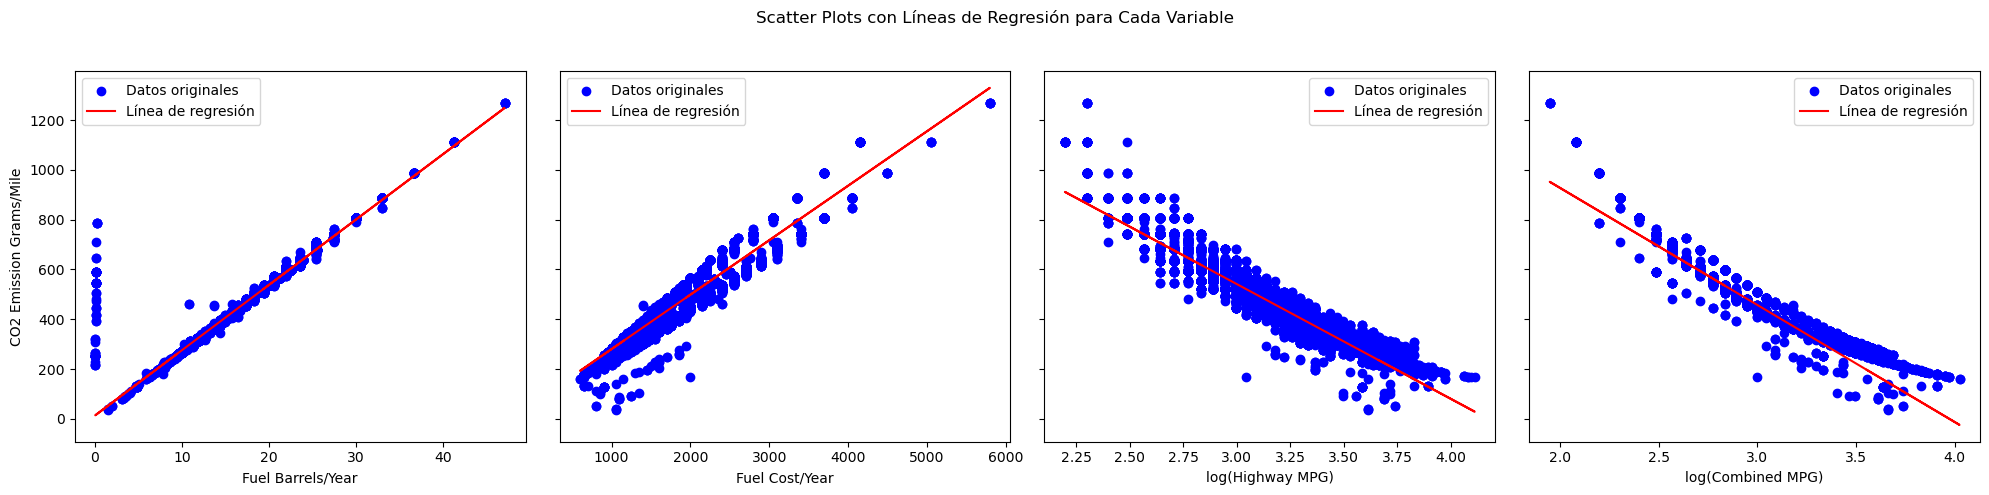

In [163]:
def plot_regression_for_all_features(X, y, feature_names):
    # Número de variables independientes
    num_features = X.shape[1]
    
    # Crear un modelo de regresión lineal para cada variable
    fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5), sharey=True)
    fig.suptitle("Scatter Plots con Líneas de Regresión para Cada Variable")

    for i, feature_name in enumerate(feature_names):
        # Seleccionar la característica individual
        X_single = X[[feature_name]].copy()
        
        # Aplicar transformación logarítmica a las variables específicas
        if feature_name in ["Highway MPG", "Combined MPG"]:
            # Evitar log(0) reemplazando 0s con un valor muy pequeño, e.g., 0.1
            X_single = np.log(X_single)
            transformed_label = f"log({feature_name})"  # Etiqueta para el eje x
        else:
            transformed_label = feature_name

        # Crear y ajustar el modelo de regresión lineal
        lm_single = LinearRegression()
        lm_single.fit(X_single, y)
        
        # Predicciones para la línea de regresión
        y_pred = lm_single.predict(X_single)
        
        # Gráfico de dispersión y línea de regresión
        axes[i].scatter(X_single, y, color='blue', label="Datos originales")
        axes[i].plot(X_single, y_pred, color='red', label="Línea de regresión")
        
        # Etiquetas
        axes[i].set_xlabel(transformed_label)
        if i == 0:
            axes[i].set_ylabel("CO2 Emission Grams/Mile")
        axes[i].legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el espacio para el título
    plt.show()

# Llamada a la función con tus datos
feature_names = ["Fuel Barrels/Year", "Fuel Cost/Year", "Highway MPG", "Combined MPG"]
plot_regression_for_all_features(X_m, y_m, feature_names)

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [220]:
party = pd.DataFrame({"Invites": [1,3,4,6,8,9,11,14], "Attendees": [1,2,4,4,5,7,8,13]})

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [206]:
# Definir la X / Y del modelo de regresión

X,y = party[["Invites"]], party[["Attendees"]]
print(X.shape, y.shape)

print('Shape of data: {} {}'.format(X.shape, y.shape))

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform de fitting
lm.fit(X,y)

# Print coefs
print(lm.intercept_, lm.coef_)

(8, 1) (8, 1)
Shape of data: (8, 1) (8, 1)
[-0.43939394] [[0.84848485]]


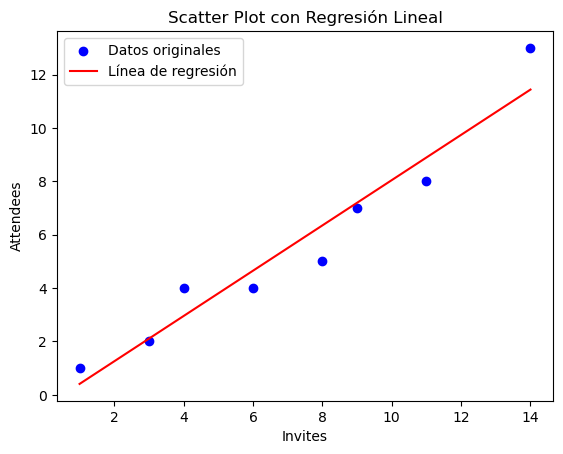

In [214]:
# Agregar las predicciones al DataFrame
party['Predicciones'] = lm.predict(X)

# 2. Crear el diagrama de dispersión de los datos originales
plt.scatter(x=party['Invites'], y=party['Attendees'], color='blue', label="Datos originales")

# 3. Graficar la línea de regresión
plt.plot(party['Invites'], party['Predicciones'], color='red', label="Línea de regresión")

# 4. Añadir etiquetas y título
plt.xlabel("Invites")
plt.ylabel("Attendees")
plt.title("Scatter Plot con Regresión Lineal")
plt.legend()

# 5. Mostrar el gráfico
plt.show()

In [216]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y, party["Predicciones"])

0.9316696375519905

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

Exite una relación lineal entre invitados y número de asistentes a la fiesta

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [222]:
party2 = pd.DataFrame({"Invites": [1,3,4,6,8,9,11], "Attendees": [1,2,4,4,5,7,8]})

In [225]:
# Definir la X / Y del modelo de regresión

X,y = party2[["Invites"]], party2[["Attendees"]]
print(X.shape, y.shape)

print('Shape of data: {} {}'.format(X.shape, y.shape))

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform de fitting
lm.fit(X,y)

# Print coefs
print(lm.intercept_, lm.coef_)

(7, 1) (7, 1)
Shape of data: (7, 1) (7, 1)
[0.32330827] [[0.68421053]]


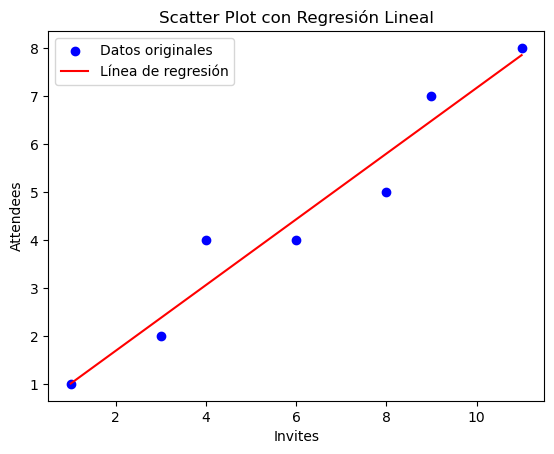

In [228]:
# Agregar las predicciones al DataFrame
party2['Predicciones'] = lm.predict(X)

# 2. Crear el diagrama de dispersión de los datos originales
plt.scatter(x=party2['Invites'], y=party2['Attendees'], color='blue', label="Datos originales")

# 3. Graficar la línea de regresión
plt.plot(party2['Invites'], party2['Predicciones'], color='red', label="Línea de regresión")

# 4. Añadir etiquetas y título
plt.xlabel("Invites")
plt.ylabel("Attendees")
plt.title("Scatter Plot con Regresión Lineal")
plt.legend()

# 5. Mostrar el gráfico
plt.show()

In [231]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y, party2["Predicciones"])

0.9433811802232854

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

La observación 14 invitados, 13 asistentes era el outlier. Sin esta observación la regresión se ajusta mejor al modelo.